# Spotify 1 Million Tracks - Tratamento e Modelação

### Importe das Bibliotecas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score, confusion_matrix,f1_score, classification_report
from sklearn.linear_model import LinearRegression, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
%matplotlib inline


# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

## Tratamento dos Dados

Carregar o dataset, previamente analisado

In [ ]:
data = pd.read_csv('data.csv')

Eliminar coluns irrelevantes:
id e name

In [ ]:
# Drop Id and Track Id columns
data.drop(['id', 'release_date'], axis=1, inplace=True, errors='ignore')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Remover duplicados

In [ ]:
data.drop_duplicates(inplace=True)
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Tratamento dos artistas

In [ ]:
data["artists"] = data["artists"].str.replace("[\[\]']", "", regex=True)
data['artists'] = data['artists'].str.split(', ')
data = data.explode('artists')
data

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.9950,Carl Woitschach,0.708,158648,0.1950,0,0.56300,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.9940,Robert Schumann,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
1,0.9940,Vladimir Horowitz,0.379,282133,0.0135,0,0.90100,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.6040,Seweryn Goszczyński,0.749,104300,0.2200,0,0.00000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.9950,Francisco Canaro,0.781,180760,0.1300,0,0.88700,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169906,0.5380,Kygo,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169906,0.5380,Oh Wonder,0.514,180700,0.5390,0,0.00233,7,0.1080,-9.332,1,How Would I Know,70,0.1050,123.700,0.1530,2020
169907,0.0714,Cash Cash,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020
169907,0.0714,Andy Grammer,0.646,167308,0.7610,0,0.00000,1,0.2220,-2.557,1,I Found You,70,0.0385,129.916,0.4720,2020


Encoding dos artistas

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['artists'] = label_encoder.fit_transform(data['artists'])

Encoding do nome da música

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['name'] = label_encoder.fit_transform(data['name'])

<Axes: >

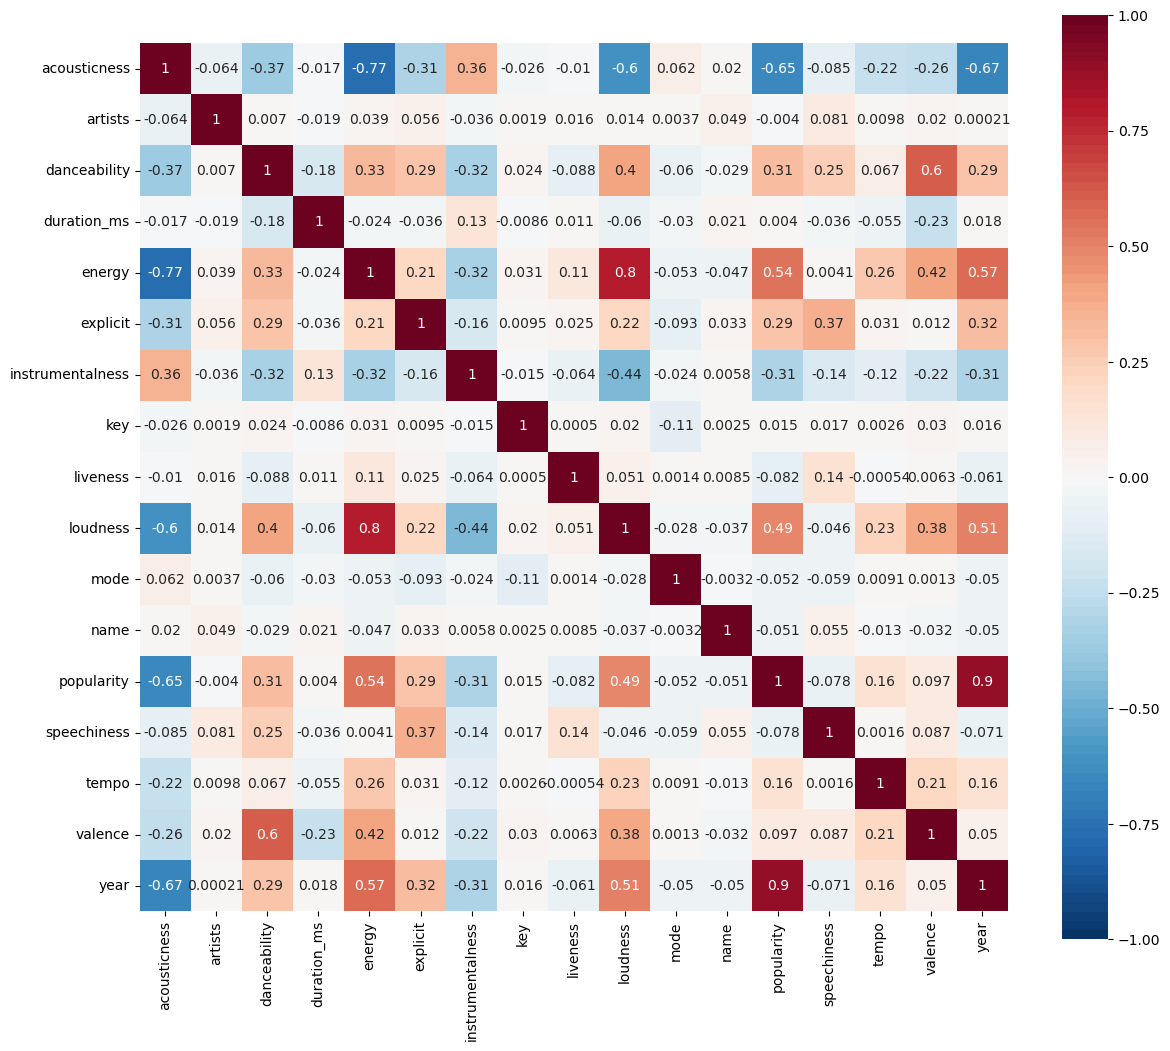

In [ ]:
corr_matrix = data.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

Remover os registos com popularidade igual a 0 para termos uma melhor distribuição

Remover outliers por género

In [ ]:
"""q3 = data.groupby(by=['genre']).quantile(0.75,numeric_only=True).sort_values(by='popularity', ascending=False)['popularity']
q1 = data.groupby(by=['genre']).quantile(0.25,numeric_only=True).sort_values(by='popularity', ascending=False)['popularity']

data_aux = data.merge(q1, left_on='genre', right_index=True, suffixes=('', '_q1'))
data_aux = data_aux.merge(q3, left_on='genre', right_index=True, suffixes=('', '_q3'))
data_aux['iqr'] = data_aux['popularity_q3'] - data_aux['popularity_q1']

#data_aux
# Verificar os outliers
no_outliers = data_aux[(data_aux['popularity'] <= data_aux['popularity_q3'] + 1.5 * data_aux['iqr']) & (data_aux['popularity'] >= data_aux['popularity_q1'] - 1.5 * data_aux['iqr'])]
no_outliers.drop(['popularity_q1', 'popularity_q3', 'iqr'], axis=1, inplace=True)
no_outliers"""

"q3 = data.groupby(by=['genre']).quantile(0.75,numeric_only=True).sort_values(by='popularity', ascending=False)['popularity']\nq1 = data.groupby(by=['genre']).quantile(0.25,numeric_only=True).sort_values(by='popularity', ascending=False)['popularity']\n\ndata_aux = data.merge(q1, left_on='genre', right_index=True, suffixes=('', '_q1'))\ndata_aux = data_aux.merge(q3, left_on='genre', right_index=True, suffixes=('', '_q3'))\ndata_aux['iqr'] = data_aux['popularity_q3'] - data_aux['popularity_q1']\n\n#data_aux\n# Verificar os outliers\nno_outliers = data_aux[(data_aux['popularity'] <= data_aux['popularity_q3'] + 1.5 * data_aux['iqr']) & (data_aux['popularity'] >= data_aux['popularity_q1'] - 1.5 * data_aux['iqr'])]\nno_outliers.drop(['popularity_q1', 'popularity_q3', 'iqr'], axis=1, inplace=True)\nno_outliers"

Converter valores categóricos para valores contínuos

In [ ]:
"""data_non_categorical = data.copy()
lb_make = LabelEncoder()
data_non_categorical['artist_name'] = lb_make.fit_transform(data_non_categorical['artist_name'])
data_non_categorical['genre'] = lb_make.fit_transform(data_non_categorical['genre'])
data_non_categorical"""

"data_non_categorical = data.copy()\nlb_make = LabelEncoder()\ndata_non_categorical['artist_name'] = lb_make.fit_transform(data_non_categorical['artist_name'])\ndata_non_categorical['genre'] = lb_make.fit_transform(data_non_categorical['genre'])\ndata_non_categorical"

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142497 entries, 4 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      142497 non-null  float64
 1   danceability      142497 non-null  float64
 2   duration_ms       142497 non-null  int64  
 3   energy            142497 non-null  float64
 4   explicit          142497 non-null  int64  
 5   instrumentalness  142497 non-null  float64
 6   key               142497 non-null  int64  
 7   liveness          142497 non-null  float64
 8   loudness          142497 non-null  float64
 9   mode              142497 non-null  int64  
 10  popularity        142497 non-null  int64  
 11  speechiness       142497 non-null  float64
 12  tempo             142497 non-null  float64
 13  valence           142497 non-null  float64
 14  year              142497 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 17.4 MB


### Remoção de outliers

In [ ]:
no_outliers = data.copy()

Acousticness

In [ ]:

q1 = no_outliers['acousticness'].quantile(0.25)
q3 = no_outliers['acousticness'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['acousticness'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['acousticness'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['acousticness'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['acousticness'] >= q1 - 1.5 * (q3 - q1))]

-1.0015
0
1.8377
0


Danceability

In [ ]:
q1 = no_outliers['danceability'].quantile(0.25)
q3 = no_outliers['danceability'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['danceability'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['danceability'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['danceability'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['danceability'] >= q1 - 1.5 * (q3 - q1))]

0.06699999999999989
226
1.0350000000000001
0


Loudness

In [ ]:
no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142271 entries, 4 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      142271 non-null  float64
 1   danceability      142271 non-null  float64
 2   duration_ms       142271 non-null  int64  
 3   energy            142271 non-null  float64
 4   explicit          142271 non-null  int64  
 5   instrumentalness  142271 non-null  float64
 6   key               142271 non-null  int64  
 7   liveness          142271 non-null  float64
 8   loudness          142271 non-null  float64
 9   mode              142271 non-null  int64  
 10  popularity        142271 non-null  int64  
 11  speechiness       142271 non-null  float64
 12  tempo             142271 non-null  float64
 13  valence           142271 non-null  float64
 14  year              142271 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 17.4 MB


In [ ]:
q1 = no_outliers['loudness'].quantile(0.25)
q3 = no_outliers['loudness'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['loudness'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['loudness'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['loudness'] <= q3 + 1.5 * (q3 - q1))]
no_outliers

-23.493
3647
3.4429999999999987
1


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
11,0.9890,0.170,85133,0.0823,0,0.911000,10,0.0962,-30.107,0,1,0.0317,85.989,0.3460,1928
40,0.9770,0.305,215267,0.0830,0,0.697000,6,0.2310,-20.895,1,1,0.0331,80.622,0.0479,1928
42,0.9900,0.337,333907,0.0699,0,0.903000,5,0.1060,-23.806,0,2,0.0322,72.133,0.1350,1928
47,0.9850,0.355,138013,0.0452,0,0.825000,1,0.1530,-24.125,1,2,0.0329,84.551,0.2760,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


In [ ]:
no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142270 entries, 4 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      142270 non-null  float64
 1   danceability      142270 non-null  float64
 2   duration_ms       142270 non-null  int64  
 3   energy            142270 non-null  float64
 4   explicit          142270 non-null  int64  
 5   instrumentalness  142270 non-null  float64
 6   key               142270 non-null  int64  
 7   liveness          142270 non-null  float64
 8   loudness          142270 non-null  float64
 9   mode              142270 non-null  int64  
 10  popularity        142270 non-null  int64  
 11  speechiness       142270 non-null  float64
 12  tempo             142270 non-null  float64
 13  valence           142270 non-null  float64
 14  year              142270 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 17.4 MB


Speechiness

In [ ]:
q1 = no_outliers['speechiness'].quantile(0.25)
q3 = no_outliers['speechiness'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['speechiness'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['speechiness'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['speechiness'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['speechiness'] >= q1 - 1.5 * (q3 - q1))]
no_outliers

-0.020149999999999987
0
0.12424999999999999
18645


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
11,0.9890,0.170,85133,0.0823,0,0.911000,10,0.0962,-30.107,0,1,0.0317,85.989,0.3460,1928
40,0.9770,0.305,215267,0.0830,0,0.697000,6,0.2310,-20.895,1,1,0.0331,80.622,0.0479,1928
42,0.9900,0.337,333907,0.0699,0,0.903000,5,0.1060,-23.806,0,2,0.0322,72.133,0.1350,1928
47,0.9850,0.355,138013,0.0452,0,0.825000,1,0.1530,-24.125,1,2,0.0329,84.551,0.2760,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.1120,-4.451,1,68,0.0374,97.479,0.9340,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


Valence

In [ ]:
q1 = no_outliers['valence'].quantile(0.25)
q3 = no_outliers['valence'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['valence'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['valence'] >= q3 + 1.5 * (q3 - q1)].shape[0])


no_outliers = no_outliers[(no_outliers['valence'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['valence'] >= q1 - 1.5 * (q3 - q1))]
no_outliers

-0.3389999999999998
0
1.4129999999999998
0


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
11,0.9890,0.170,85133,0.0823,0,0.911000,10,0.0962,-30.107,0,1,0.0317,85.989,0.3460,1928
40,0.9770,0.305,215267,0.0830,0,0.697000,6,0.2310,-20.895,1,1,0.0331,80.622,0.0479,1928
42,0.9900,0.337,333907,0.0699,0,0.903000,5,0.1060,-23.806,0,2,0.0322,72.133,0.1350,1928
47,0.9850,0.355,138013,0.0452,0,0.825000,1,0.1530,-24.125,1,2,0.0329,84.551,0.2760,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.1120,-4.451,1,68,0.0374,97.479,0.9340,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


Tempo

In [ ]:
q1 = no_outliers['tempo'].quantile(0.25)
q3 = no_outliers['tempo'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['tempo'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['tempo'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['tempo'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['tempo'] >= q1 - 1.5 * (q3 - q1))]
no_outliers

35.78999999999999
11
196.318
1139


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
11,0.9890,0.170,85133,0.0823,0,0.911000,10,0.0962,-30.107,0,1,0.0317,85.989,0.3460,1928
40,0.9770,0.305,215267,0.0830,0,0.697000,6,0.2310,-20.895,1,1,0.0331,80.622,0.0479,1928
42,0.9900,0.337,333907,0.0699,0,0.903000,5,0.1060,-23.806,0,2,0.0322,72.133,0.1350,1928
47,0.9850,0.355,138013,0.0452,0,0.825000,1,0.1530,-24.125,1,2,0.0329,84.551,0.2760,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.1120,-4.451,1,68,0.0374,97.479,0.9340,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


Duration

In [ ]:
q1 = no_outliers['duration_ms'].quantile(0.25)
q3 = no_outliers['duration_ms'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['duration_ms'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['duration_ms'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['duration_ms'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['duration_ms'] >= q1 - 1.5 * (q3 - q1))]
no_outliers

35600.5
51
407972.5
5950


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
11,0.9890,0.170,85133,0.0823,0,0.911000,10,0.0962,-30.107,0,1,0.0317,85.989,0.3460,1928
40,0.9770,0.305,215267,0.0830,0,0.697000,6,0.2310,-20.895,1,1,0.0331,80.622,0.0479,1928
42,0.9900,0.337,333907,0.0699,0,0.903000,5,0.1060,-23.806,0,2,0.0322,72.133,0.1350,1928
47,0.9850,0.355,138013,0.0452,0,0.825000,1,0.1530,-24.125,1,2,0.0329,84.551,0.2760,1928
59,0.9910,0.839,162147,0.3700,0,0.041900,2,0.1040,-11.602,1,1,0.0800,115.063,0.9760,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.1120,-4.451,1,68,0.0374,97.479,0.9340,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


In [ ]:
no_outliers.sort_values(by='duration_ms', ascending=False)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
131340,0.701,0.289,407947,0.165,0,0.21700,10,0.1100,-17.606,1,35,0.0301,83.720,0.1120,1979
103826,0.461,0.512,407867,0.455,0,0.43600,2,0.1240,-8.595,1,46,0.0300,181.112,0.5820,1985
120044,0.417,0.623,407840,0.315,0,0.35400,0,0.0195,-15.144,1,26,0.0574,116.304,0.4910,1959
80571,0.995,0.319,407827,0.035,0,0.91700,7,0.0916,-26.216,1,18,0.0619,73.181,0.0502,1946
141610,0.292,0.342,407800,0.379,0,0.00426,9,0.1010,-10.525,0,42,0.0294,138.771,0.0857,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163568,0.993,0.552,36027,0.381,0,0.89700,5,0.1810,-18.549,1,19,0.0745,117.332,0.9620,1957
36952,0.751,0.536,35973,0.229,0,0.00000,4,0.6290,-24.760,1,37,0.0537,148.165,0.9640,1988
89660,0.920,0.438,35933,0.274,0,0.00000,0,0.6730,-13.897,0,13,0.0527,126.755,0.3970,1939
140122,0.789,0.302,35800,0.392,0,0.00000,2,0.7910,-16.468,1,39,0.1180,125.161,0.1560,1978


Energy

In [ ]:
q1 = no_outliers['energy'].quantile(0.25)
q3 = no_outliers['energy'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['energy'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['energy'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['energy'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['energy'] >= q1 - 1.5 * (q3 - q1))]
no_outliers

-0.33
0
1.374
0


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
11,0.9890,0.170,85133,0.0823,0,0.911000,10,0.0962,-30.107,0,1,0.0317,85.989,0.3460,1928
40,0.9770,0.305,215267,0.0830,0,0.697000,6,0.2310,-20.895,1,1,0.0331,80.622,0.0479,1928
42,0.9900,0.337,333907,0.0699,0,0.903000,5,0.1060,-23.806,0,2,0.0322,72.133,0.1350,1928
47,0.9850,0.355,138013,0.0452,0,0.825000,1,0.1530,-24.125,1,2,0.0329,84.551,0.2760,1928
59,0.9910,0.839,162147,0.3700,0,0.041900,2,0.1040,-11.602,1,1,0.0800,115.063,0.9760,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.1120,-4.451,1,68,0.0374,97.479,0.9340,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


Instrumentalness

In [ ]:
q1 = no_outliers['instrumentalness'].quantile(0.25)
q3 = no_outliers['instrumentalness'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['instrumentalness'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['instrumentalness'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['instrumentalness'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['instrumentalness'] >= q1 - 1.5 * (q3 - q1))]
no_outliers

-0.04035
0
0.06725
25054


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
59,0.9910,0.839,162147,0.3700,0,0.041900,2,0.104,-11.602,1,1,0.0800,115.063,0.976,1928
67,0.9470,0.333,122733,0.1460,0,0.000426,2,0.265,-16.990,1,2,0.0353,75.372,0.234,1928
82,0.9180,0.754,184840,0.1940,0,0.000043,3,0.188,-11.634,1,1,0.0530,84.042,0.454,1928
108,0.9510,0.690,169509,0.7140,0,0.000348,0,0.234,-15.857,0,2,0.0747,116.188,0.804,1930
117,0.8700,0.353,137090,0.0785,0,0.000002,0,0.112,-18.434,0,2,0.0376,70.535,0.261,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.112,-4.451,1,68,0.0374,97.479,0.934,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.111,-10.907,1,64,0.0403,128.000,0.270,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.108,-9.332,1,70,0.1050,123.700,0.153,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.222,-2.557,1,70,0.0385,129.916,0.472,2020


Liveness

In [ ]:
q1 = no_outliers['liveness'].quantile(0.25)
q3 = no_outliers['liveness'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['liveness'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['liveness'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['liveness'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['liveness'] >= q1 - 1.5 * (q3 - q1))]
no_outliers

-0.1345
0
0.4759
5616


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
59,0.9910,0.839,162147,0.3700,0,0.041900,2,0.104,-11.602,1,1,0.0800,115.063,0.976,1928
67,0.9470,0.333,122733,0.1460,0,0.000426,2,0.265,-16.990,1,2,0.0353,75.372,0.234,1928
82,0.9180,0.754,184840,0.1940,0,0.000043,3,0.188,-11.634,1,1,0.0530,84.042,0.454,1928
108,0.9510,0.690,169509,0.7140,0,0.000348,0,0.234,-15.857,0,2,0.0747,116.188,0.804,1930
117,0.8700,0.353,137090,0.0785,0,0.000002,0,0.112,-18.434,0,2,0.0376,70.535,0.261,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.112,-4.451,1,68,0.0374,97.479,0.934,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.111,-10.907,1,64,0.0403,128.000,0.270,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.108,-9.332,1,70,0.1050,123.700,0.153,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.222,-2.557,1,70,0.0385,129.916,0.472,2020


Popularity

In [ ]:
q1 = no_outliers['liveness'].quantile(0.25)
q3 = no_outliers['liveness'].quantile(0.75)

print(q1 - 1.5 * (q3 - q1))
print(no_outliers[no_outliers['liveness'] <= q1 - 1.5 * (q3 - q1)].shape[0])
print(q3 + 1.5 * (q3 - q1))
print(no_outliers[no_outliers['liveness'] >= q3 + 1.5 * (q3 - q1)].shape[0])

no_outliers = no_outliers[(no_outliers['liveness'] <= q3 + 1.5 * (q3 - q1)) & (no_outliers['liveness'] >= q1 - 1.5 * (q3 - q1))]
no_outliers

-0.08875
0
0.39405
2285


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
59,0.9910,0.839,162147,0.3700,0,0.041900,2,0.104,-11.602,1,1,0.0800,115.063,0.976,1928
67,0.9470,0.333,122733,0.1460,0,0.000426,2,0.265,-16.990,1,2,0.0353,75.372,0.234,1928
82,0.9180,0.754,184840,0.1940,0,0.000043,3,0.188,-11.634,1,1,0.0530,84.042,0.454,1928
108,0.9510,0.690,169509,0.7140,0,0.000348,0,0.234,-15.857,0,2,0.0747,116.188,0.804,1930
117,0.8700,0.353,137090,0.0785,0,0.000002,0,0.112,-18.434,0,2,0.0376,70.535,0.261,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.112,-4.451,1,68,0.0374,97.479,0.934,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.111,-10.907,1,64,0.0403,128.000,0.270,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.108,-9.332,1,70,0.1050,123.700,0.153,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.222,-2.557,1,70,0.0385,129.916,0.472,2020


In [ ]:
no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83519 entries, 59 to 169908
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      83519 non-null  float64
 1   danceability      83519 non-null  float64
 2   duration_ms       83519 non-null  int64  
 3   energy            83519 non-null  float64
 4   explicit          83519 non-null  int64  
 5   instrumentalness  83519 non-null  float64
 6   key               83519 non-null  int64  
 7   liveness          83519 non-null  float64
 8   loudness          83519 non-null  float64
 9   mode              83519 non-null  int64  
 10  popularity        83519 non-null  int64  
 11  speechiness       83519 non-null  float64
 12  tempo             83519 non-null  float64
 13  valence           83519 non-null  float64
 14  year              83519 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 10.2 MB


In [ ]:
no_outliers

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
59,0.9910,0.839,162147,0.3700,0,0.041900,2,0.104,-11.602,1,1,0.0800,115.063,0.976,1928
67,0.9470,0.333,122733,0.1460,0,0.000426,2,0.265,-16.990,1,2,0.0353,75.372,0.234,1928
82,0.9180,0.754,184840,0.1940,0,0.000043,3,0.188,-11.634,1,1,0.0530,84.042,0.454,1928
108,0.9510,0.690,169509,0.7140,0,0.000348,0,0.234,-15.857,0,2,0.0747,116.188,0.804,1930
117,0.8700,0.353,137090,0.0785,0,0.000002,0,0.112,-18.434,0,2,0.0376,70.535,0.261,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169903,0.2100,0.795,218501,0.5850,0,0.000001,8,0.112,-4.451,1,68,0.0374,97.479,0.934,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.111,-10.907,1,64,0.0403,128.000,0.270,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.108,-9.332,1,70,0.1050,123.700,0.153,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.222,-2.557,1,70,0.0385,129.916,0.472,2020


### Data Scaling

Importar as bibliotecas necessárias

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Criar um objeto do tipo MinMaxScaler para transformar cada coluna do dataset de modo que os seus valores fiquem entre 0 e 1

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(no_outliers)
data_scaled = pd.DataFrame(scaler.transform(no_outliers[no_outliers.columns]), columns=no_outliers.columns)

In [ ]:
data_scaled

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.994980,0.838167,0.339200,0.369753,0.0,0.623512,0.181818,0.244595,0.717662,1.0,0.000000,0.567355,0.493262,0.976924,0.070707
1,0.950803,0.288585,0.233178,0.145309,0.0,0.006339,0.181818,0.663975,0.597643,1.0,0.010101,0.127827,0.245652,0.232483,0.070707
2,0.921687,0.745846,0.400244,0.193405,0.0,0.000646,0.272727,0.463402,0.716949,1.0,0.000000,0.301868,0.299739,0.453207,0.070707
3,0.954819,0.676333,0.359004,0.714435,0.0,0.005179,0.000000,0.583225,0.622881,0.0,0.010101,0.515241,0.500281,0.804358,0.090909
4,0.873494,0.310307,0.271798,0.077676,0.0,0.000033,0.000000,0.265434,0.565478,0.0,0.010101,0.150442,0.215476,0.259571,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83514,0.210842,0.790377,0.490791,0.585179,0.0,0.000018,0.727273,0.265434,0.876952,1.0,0.676768,0.148476,0.383565,0.934786,1.000000
83515,0.016766,0.707831,0.353514,0.384783,0.0,0.465774,0.727273,0.262829,0.733143,1.0,0.636364,0.176991,0.573969,0.268601,1.000000
83516,0.540160,0.485174,0.389107,0.539088,0.0,0.034673,0.636364,0.255014,0.768227,1.0,0.696970,0.813176,0.547144,0.151216,1.000000
83517,0.071685,0.628543,0.353083,0.761528,0.0,0.000000,0.090909,0.551967,0.919141,1.0,0.696970,0.159292,0.585922,0.471266,1.000000


### Redução dimensional

Reduzir o número de features (dimensões do problema), mantendo o máximo de informação possível

AutoEncoders

In [ ]:
#X_reduction = data_non_categorical.drop('popularity', axis=1)
#y_reduction = data_non_categorical['popularity']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_reduction, y_reduction, test_size=0.4, random_state=101)

In [ ]:
#from tensorflow.keras.layers import Input, Dense
#from tensorflow.keras.models import Model

# Define the autoencoder model
#input_layer = Input(shape=(X_reduction.shape[1],))
#encoded = Dense(5, activation='relu')(input_layer)
#decoded = Dense(X_reduction.shape[1], activation='sigmoid')(encoded)

#autoencoder = Model(input_layer, decoded)
#autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
#autoencoder.fit(X_train, y_train, epochs=1, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

In [ ]:
#encoder = Model(input_layer, encoded)
#encoded_features = encoder.predict(X_train)

#encoded_features

--------------

Recursive Feature Elimination

In [ ]:
#model = LinearRegression()

In [ ]:
#number_features_to_select = 10  # You can choose the number of features you want to retain
#rfe = RFE(model, n_features_to_select=number_features_to_select)

In [ ]:
#rfe.fit(X_reduction, y_reduction)

In [ ]:
#selected_features = X_reduction.columns[rfe.support_]
#ranking = rfe.ranking_
#selected_features = selected_features.append(pd.Index(['duration_ms']))

In [ ]:
#X_selected = X_reduction[selected_features]
#X_selected

#### Standardização

In [ ]:
#no_outliers.info()

### Oversampling

In [ ]:
#from imblearn.over_sampling import SMOTE

In [ ]:
#X = no_outliers.filter(['popularity'])
#y = no_outliers['popularity']

In [ ]:
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

## Análise pós tratamento

In [ ]:
#X = no_outliers.filter('popularity')#.drop('popularity', axis=1)
#y = no_outliers[no_outliers['popularity'] > 0]['popularity']

In [ ]:
#from scipy import stats

# Assuming 'y' is your target variable
#transformed_y, lambda_best_fit = stats.boxcox(y)
#transformed_y

In [ ]:
#sns.histplot(no_outliers['popularity'], bins=100)

In [ ]:
#sns.histplot(transformed_y, bins=100)

In [ ]:
#transformed_y = np.log(y)

In [ ]:
#sns.histplot(transformed_y, bins=100)

## Modelação 

Partição dos Dados entre dados de treino e teste

In [ ]:
selected_features = pd.Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'loudness', 'popularity', 'key', 'liveness', 'mode', 'speechiness', 'tempo', 'valence'])

In [ ]:
print(selected_features)

Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'loudness', 'popularity', 'key',
       'liveness', 'mode', 'speechiness', 'tempo', 'valence'],
      dtype='object')


In [ ]:
#scaler = StandardScaler()
#standardized_data = scaler.fit_transform(X)
#print(standardized_data)

In [ ]:
data_scaled

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.994980,0.838167,0.339200,0.369753,0.0,0.623512,0.181818,0.244595,0.717662,1.0,0.000000,0.567355,0.493262,0.976924,0.070707
1,0.950803,0.288585,0.233178,0.145309,0.0,0.006339,0.181818,0.663975,0.597643,1.0,0.010101,0.127827,0.245652,0.232483,0.070707
2,0.921687,0.745846,0.400244,0.193405,0.0,0.000646,0.272727,0.463402,0.716949,1.0,0.000000,0.301868,0.299739,0.453207,0.070707
3,0.954819,0.676333,0.359004,0.714435,0.0,0.005179,0.000000,0.583225,0.622881,0.0,0.010101,0.515241,0.500281,0.804358,0.090909
4,0.873494,0.310307,0.271798,0.077676,0.0,0.000033,0.000000,0.265434,0.565478,0.0,0.010101,0.150442,0.215476,0.259571,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83514,0.210842,0.790377,0.490791,0.585179,0.0,0.000018,0.727273,0.265434,0.876952,1.0,0.676768,0.148476,0.383565,0.934786,1.000000
83515,0.016766,0.707831,0.353514,0.384783,0.0,0.465774,0.727273,0.262829,0.733143,1.0,0.636364,0.176991,0.573969,0.268601,1.000000
83516,0.540160,0.485174,0.389107,0.539088,0.0,0.034673,0.636364,0.255014,0.768227,1.0,0.696970,0.813176,0.547144,0.151216,1.000000
83517,0.071685,0.628543,0.353083,0.761528,0.0,0.000000,0.090909,0.551967,0.919141,1.0,0.696970,0.159292,0.585922,0.471266,1.000000


In [ ]:
final_data = data_scaled.copy()
final_data = final_data[selected_features]
X = final_data.drop('popularity', axis=1)
y = final_data['popularity']
X


,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,loudness,key,liveness,mode,speechiness,tempo,valence
0,0.070707,0.994980,0.838167,0.339200,0.369753,0.0,0.623512,0.717662,0.181818,0.244595,1.0,0.567355,0.493262,0.976924
1,0.070707,0.950803,0.288585,0.233178,0.145309,0.0,0.006339,0.597643,0.181818,0.663975,1.0,0.127827,0.245652,0.232483
2,0.070707,0.921687,0.745846,0.400244,0.193405,0.0,0.000646,0.716949,0.272727,0.463402,1.0,0.301868,0.299739,0.453207
3,0.090909,0.954819,0.676333,0.359004,0.714435,0.0,0.005179,0.622881,0.000000,0.583225,0.0,0.515241,0.500281,0.804358
4,0.090909,0.873494,0.310307,0.271798,0.077676,0.0,0.000033,0.565478,0.000000,0.265434,0.0,0.150442,0.215476,0.259571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83514,1.000000,0.210842,0.790377,0.490791,0.585179,0.0,0.000018,0.876952,0.727273,0.265434,1.0,0.148476,0.383565,0.934786
83515,1.000000,0.016766,0.707831,0.353514,0.384783,0.0,0.465774,0.733143,0.727273,0.262829,1.0,0.176991,0.573969,0.268601
83516,1.000000,0.540160,0.485174,0.389107,0.539088,0.0,0.034673,0.768227,0.636364,0.255014,1.0,0.813176,0.547144,0.151216
83517,1.000000,0.071685,0.628543,0.353083,0.761528,0.0,0.000000,0.919141,0.090909,0.551967,1.0,0.159292,0.585922,0.471266


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Problema de regressão

Validação de modelos (tirar depois)
- sklearn.model_selection.train_test_split
- sklearn.model_selection.Kfold
- sklearn.model_selection.LeaveOneOut
- sklearn.model_selection.StratifiedKFold
- sklearn.model_selection.GridSearchCV
- sklearn.model_selection.RandomizedSearchCV

#### Modelo de Regressão Linear

Criação do modelo

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Previsões do modelo

In [ ]:
predictions = lm.predict(X_test)
predictions

array([ 0.17823656,  0.03858104, -0.0514646 , ...,  0.09745947,
        0.11023196,  0.29458214])

Gráfico de previsão vs valor real
- X: valor real
- Y: previsão

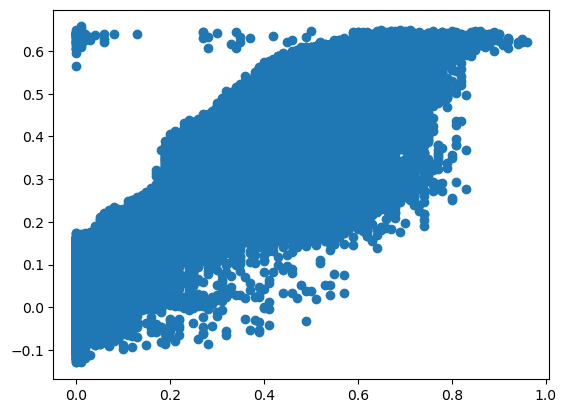

In [ ]:
plt.scatter(y_test, predictions)

c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='popularity', ylabel='Count'>

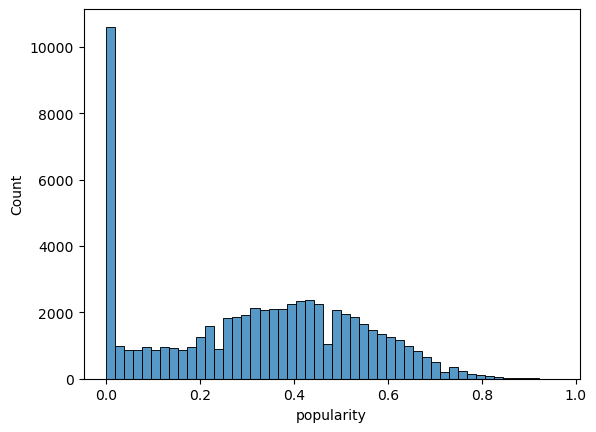

In [ ]:
sns.histplot(y_test, bins=50)

c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

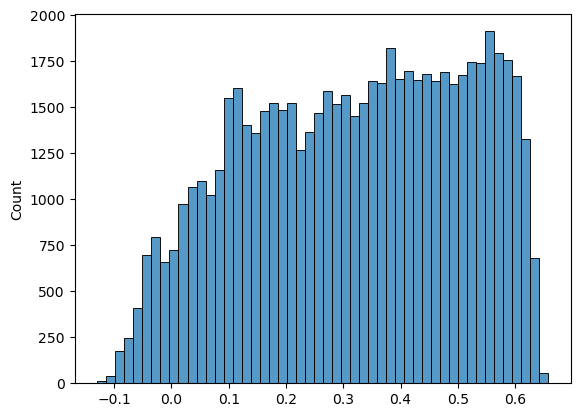

In [ ]:
sns.histplot(predictions, bins=50)

Valor máximo da previsão

In [ ]:
predictions.max()

0.6575334714909933

Comparar os valores previstos com os reais

In [ ]:
pd.merge(pd.DataFrame(y_test), pd.DataFrame(predictions), left_index=True, right_index=True)    

,popularity,0
9577,0.12,0.504478
140,0.00,0.407077
43657,0.39,0.579477
41402,0.23,0.385784
62173,0.21,0.296830
...,...,...
55498,0.27,0.133422
36786,0.51,0.334446
13135,0.38,0.097784
31381,0.00,0.540520


Avaliação do Modelo

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07776408249416723
MSE: 0.010308497892531378
RMSE: 0.1015307731307675


#### Árvores de Decisão

Criação do modelo

In [ ]:
dtree=DecisionTreeRegressor(random_state=2023)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2023)

Previsões do modelo

In [ ]:
pred = dtree.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R²:', np.sqrt(metrics.r2_score(y_test, pred)))

MAE: 10.263582109627654
MSE: 191.14446342625894
RMSE: 13.825500476520151
R²: 0.6467963787609335


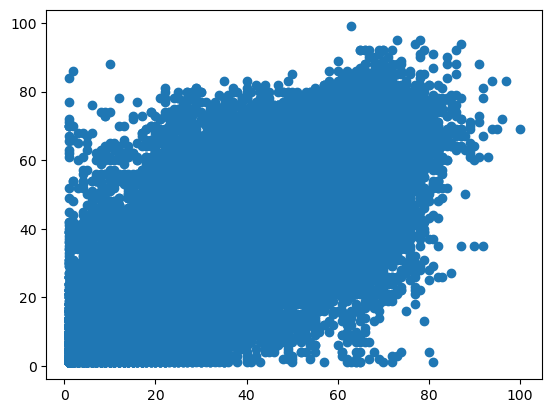

In [ ]:
plt.scatter(y_test, pred)

Grid Search

In [ ]:
# outros critérios: 'absolute_error', 'poisson'
param_grid = {'criterion':['squared_error', 'friedman_mse'],'max_depth':[4,5,6,7,8,9,10,11,12,15]}

grid_reg_bt = GridSearchCV(dtree, param_grid, refit=True, verbose=3)

In [ ]:
grid_reg_bt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=squared_error, max_depth=4;, score=0.699 total time=   0.0s
[CV 2/5] END criterion=squared_error, max_depth=4;, score=0.702 total time=   0.0s
[CV 3/5] END criterion=squared_error, max_depth=4;, score=0.704 total time=   0.0s
[CV 4/5] END criterion=squared_error, max_depth=4;, score=0.707 total time=   0.0s
[CV 5/5] END criterion=squared_error, max_depth=4;, score=0.715 total time=   0.0s
[CV 1/5] END criterion=squared_error, max_depth=5;, score=0.703 total time=   0.1s
[CV 2/5] END criterion=squared_error, max_depth=5;, score=0.706 total time=   0.1s
[CV 3/5] END criterion=squared_error, max_depth=5;, score=0.708 total time=   0.1s
[CV 4/5] END criterion=squared_error, max_depth=5;, score=0.710 total time=   0.1s
[CV 5/5] END criterion=squared_error, max_depth=5;, score=0.720 total time=   0.1s
[CV 1/5] END criterion=squared_error, max_depth=6;, score=0.704 total time=   0.1s
[CV 2/5] END criterion=sq

GridSearchCV(estimator=DecisionTreeRegressor(random_state=2023),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15]},
             verbose=3)

In [ ]:
grid_reg_bt_predictions = grid_reg_bt.predict(X_test)

In [ ]:
grid_reg_bt.best_params_

{'criterion': 'squared_error', 'max_depth': 7}

In [ ]:
grid_reg_bt.best_estimator_

DecisionTreeRegressor(max_depth=7, random_state=2023)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_reg_bt_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_reg_bt_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_reg_bt_predictions)))
print('R²:', np.sqrt(metrics.r2_score(y_test, grid_reg_bt_predictions)))

MAE: 7.455565237779633
MSE: 95.14785492126157
RMSE: 9.754376193343251
R²: 0.842890360875511


#### Gradient Boosted Trees

In [ ]:
xgbreg=XGBRegressor()
xgbreg.fit(X_train,y_train)

c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int o

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred = xgbreg.predict(X_test)

c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int o

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.375482105206118
MSE: 93.32881670736776
RMSE: 9.660684070363121


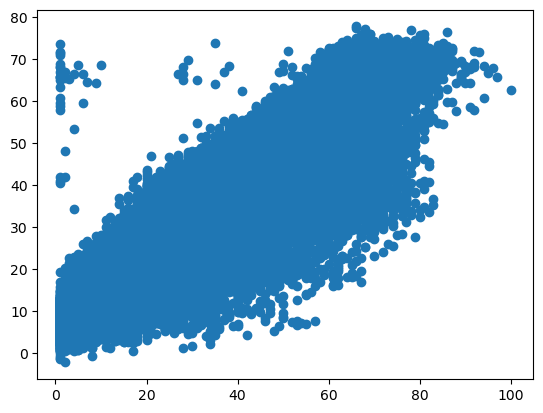

In [ ]:
plt.scatter(y_test, pred)

#### Tweedie Regressor
https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models

In [ ]:
model = TweedieRegressor(power=2, alpha=0.5, link='log')

In [ ]:
model.fit(X_train, y_train)

TweedieRegressor(alpha=0.5, link='log', power=2)

In [ ]:
pred = model.predict(X_test)
pred

array([37.72771596, 40.58961866, 35.30975559, ..., 32.37341029,
       46.07605722, 40.4618684 ])

c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

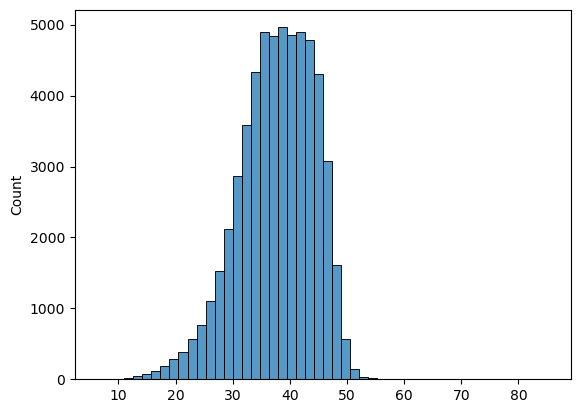

In [ ]:
sns.histplot(pred, bins=50)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 13.023261816505146
MSE: 263.5204815072802
RMSE: 16.233313941006628


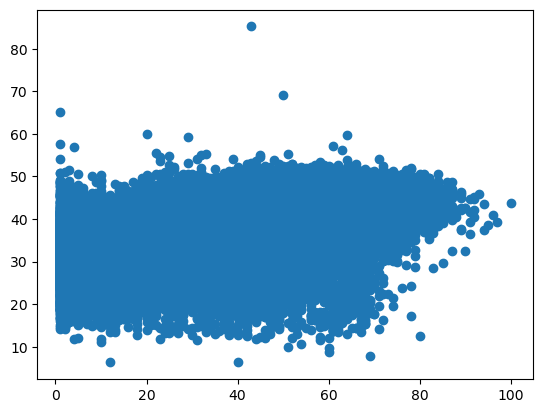

In [ ]:
plt.scatter(y_test, pred)

#### Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=2023)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=2023)

In [ ]:
pred = rf.predict(X_test)
pred

array([30.8025, 45.74  , 37.175 , ...,  8.57  , 54.94  , 62.875 ])

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 11.036969385484777
MSE: 194.13005950103013
RMSE: 13.933056358926786


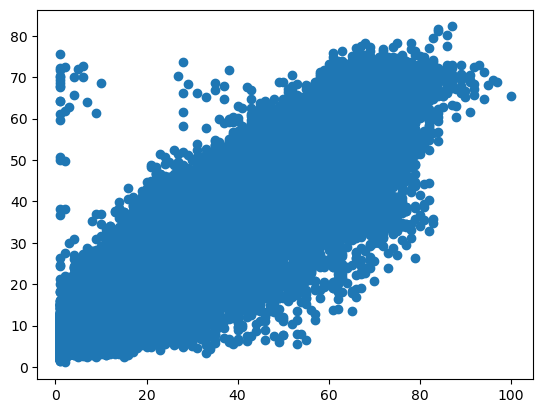

In [ ]:
plt.scatter(y_test, pred)

Grid Search

In [ ]:
param_grid = {'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_reg_rf = GridSearchCV(rf, param_grid, refit=True, verbose=3)

In [ ]:
#grid_reg_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=squared_error, max_depth=4;, score=0.702 total time=   8.7s
[CV 2/5] END criterion=squared_error, max_depth=4;, score=0.703 total time=   8.6s
[CV 3/5] END criterion=squared_error, max_depth=4;, score=0.706 total time=   8.5s
[CV 4/5] END criterion=squared_error, max_depth=4;, score=0.709 total time=   8.5s
[CV 5/5] END criterion=squared_error, max_depth=4;, score=0.717 total time=   8.5s
[CV 1/5] END criterion=squared_error, max_depth=5;, score=0.706 total time=  10.9s
[CV 2/5] END criterion=squared_error, max_depth=5;, score=0.708 total time=  11.1s
[CV 3/5] END criterion=squared_error, max_depth=5;, score=0.711 total time=  10.9s
[CV 4/5] END criterion=squared_error, max_depth=5;, score=0.712 total time=  10.9s
[CV 5/5] END criterion=squared_error, max_depth=5;, score=0.721 total time=  10.9s
[CV 1/5] END criterion=squared_error, max_depth=6;, score=0.707 total time=  13.4s
[CV 2/5] END criterion=sq

KeyboardInterrupt: 

In [ ]:
#grid_reg_rf_pred = rf.predict(X_test)

In [ ]:
#print('MAE:', metrics.mean_absolute_error(y_test, grid_reg_rf_pred))
#print('MSE:', metrics.mean_squared_error(y_test, grid_reg_rf_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_reg_rf_pred)))

In [ ]:
X_train.shape

(50111, 8)

Redes Neuronais

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

2023-11-21 10:39:28.271353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 10:39:28.512771: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 10:39:28.512811: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 10:39:28.513430: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 10:39:28.618814: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 10:39:28.620447: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [ ]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.15.0


Topologia da rede

In [ ]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation=activation)) # output

    # Compile the model
    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )
    return model

Construção do modelo

In [ ]:
model = build_model()
model.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 16)                144       
                                                                 
 dense_217 (Dense)           (None, 32)                544       
                                                                 
 dense_218 (Dense)           (None, 32)                1056      
                                                                 
 dense_219 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1777 (6.94 KB)
Trainable params: 1777 (6.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


GridSearch

In [ ]:
#optimizer = ['SGD', 'RMSprop', 'Adagrad']
optimizer = ['RMSprop'] # foi o que apresentou melhores resultados
param_grid = dict(optimizer = optimizer)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=2021)

Keras Regressor

In [ ]:
model = KerasRegressor(model = build_model, batch_size = 32, validation_split=0.2, epochs=40)

Criar um modelo Grid Search

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Epoch 1/40
1915/1915 [==============================] - 2s 787us/step - loss: 0.0718 - mae: 0.0718 - mse: 0.0106 - val_loss: 0.0661 - val_mae: 0.0661 - val_mse: 0.0095
Epoch 2/40
1915/1915 [==============================] - 1s 741us/step - loss: 0.0692 - mae: 0.0692 - mse: 0.0101 - val_loss: 0.0656 - val_mae: 0.0656 - val_mse: 0.0090
Epoch 3/40
1915/1915 [==============================] - 1s 751us/step - loss: 0.0673 - mae: 0.0673 - mse: 0.0097 - val_loss: 0.0646 - val_mae: 0.0646 - val_mse: 0.0092
Epoch 4/40
1915/1915 [==============================] - 1s 754us/step - loss: 0.0671 - mae: 0.0671 - mse: 0.0096 - val_loss: 0.0694 - val_mae: 0.0694 - val_mse: 0.0110
Epoch 5/40
1915/1915 [==============================] - 1s 759us/step - loss: 0.0666 - mae: 0.0666 - mse: 0.0095 - val_loss: 0.0645 - val_mae: 0.0645 - val_mse: 0.0089
Epoch 6/40
1915/1915 [==============================] - 1s 747us/step - loss: 0.0667 - mae: 0.0667 - 

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasRegressor(batch_size=32, epochs=40, model=<function build_model at 0x00000284A5697C70>, validation_split=0.2),
             param_grid={'optimizer': ['RMSprop']}, refit='True',
             scoring='neg_mean_absolute_error', verbose=1)

Verificar qual é o valor e os parâmetros do melhor resultado

In [ ]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.116266 using {'optimizer': 'RMSprop'}


In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.116266 (0.101799) with: {'optimizer': 'RMSprop'}


Encontrar o melhor modelo

In [ ]:
best_mlp_model = grid_search.best_estimator_ 
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x00000284A5697C70>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=RMSprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=40
)


Usar o melhor modelo

In [ ]:
best_mlp_model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/40


2993/2993 [==============================] - 3s 982us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 2/40
2993/2993 [==============================] - 3s 954us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 3/40
2993/2993 [==============================] - 3s 949us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 4/40
2993/2993 [==============================] - 3s 946us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 5/40
2993/2993 [==============================] - 3s 949us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epoch 6/40
2993/2993 [==============================] - 3s 936us/step - loss: 0.3219 - mae: 0.3219 - mse: 0.1502 - val_loss: 0.3206 - val_mae: 0.3206 - val_mse: 0.1492
Epo

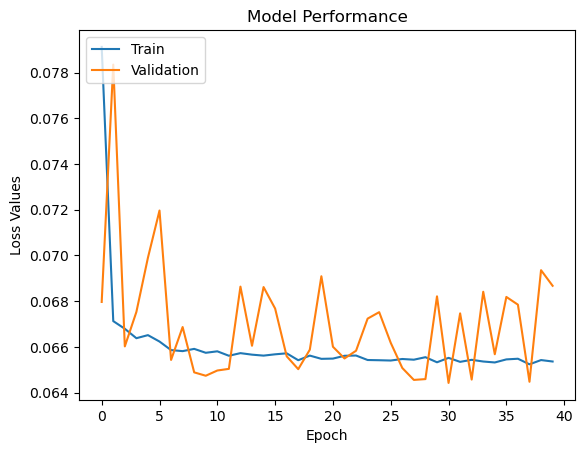

In [ ]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss Values')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

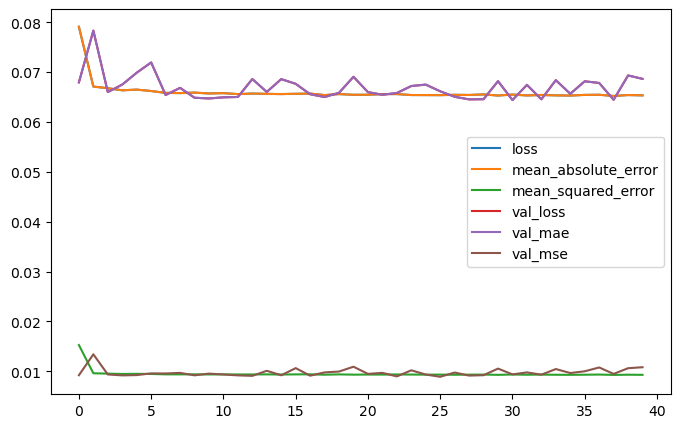

In [ ]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8, 5))
plt.show()

Previsões

In [ ]:
predictions = best_mlp_model.predict(X_test)
predictions

1044/1044 [==============================] - 1s 491us/step


array([0.22877303, 0.6590394 , 0.45143   , ..., 0.23763582, 0.35282353,
       0.5141025 ], dtype=float32)

Observar os valores obtidos vs os valores reais

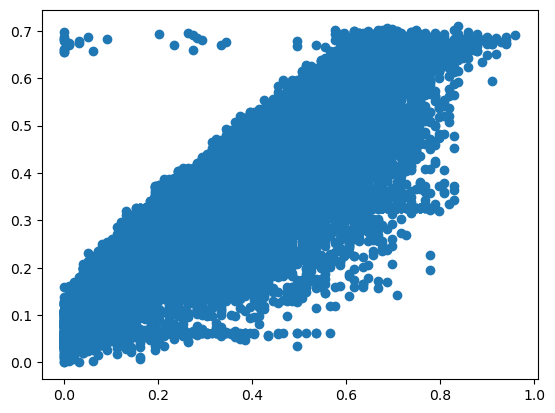

In [ ]:
plt.scatter(y_test, predictions)

Avaliar o modelo

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.07832454640943247
MSE: 0.01076444189486584
RMSE 0.10375182839288107


Criar uma forma de visualizar os resultados do modelo

In [ ]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit], label='Actual', color='green')
    plt.plot(predictions[:limit], label='Predicted', color='red')
    plt.grid(alpha=0.3)
    plt.xlabel('Houses')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

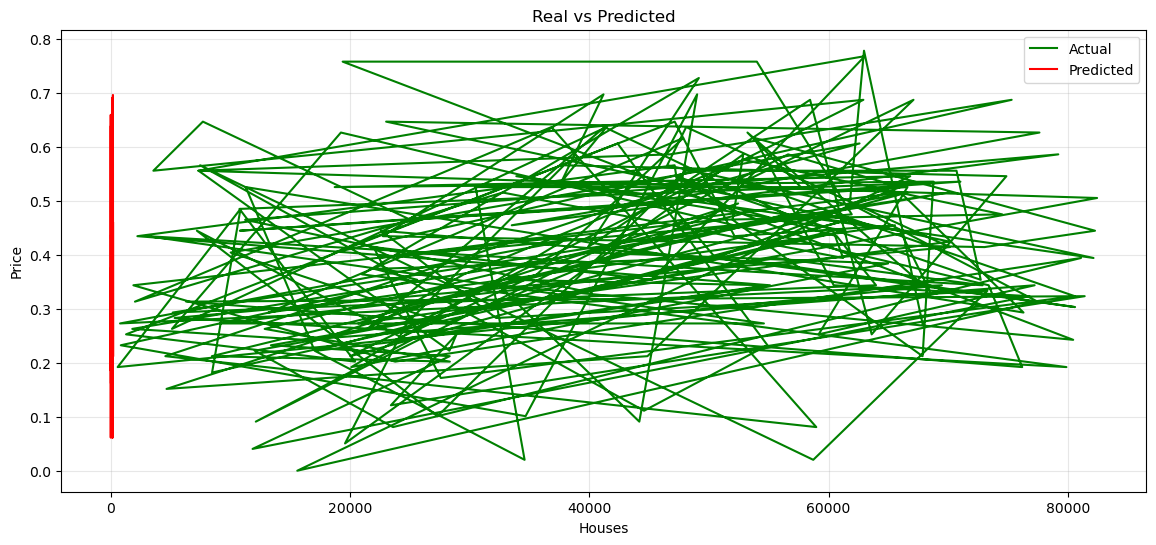

In [ ]:
real_predicted_viz(200)

### Problema de Classificação

Uma outra forma de resolver este problema de previsão da popularidade de uma música consiste em transformar a feature 'popularity', target do nosso problema, numa feature discreta, dividindo a gama de valores contínuos (0 a 100) numa série de bins, ou seja intervalos de popularidade. Por exemplo, para 10 bins, o objetivo passaria a ser o de prever qual o nível de popularidade de uma música (Nível 0 - 0..10, Nível 1 - 10..20, etc)

Vamos então transformar a feature 'popularity' numa feature discreta, recorrendo à funcionalidade KBinsDiscretizer do módulo Sci-kit learn.
Este módulo permite realizar binning de duas estratégias diferentes:

- ‘uniform’: All bins in each feature have identical widths.

- ‘quantile’: All bins in each feature have the same number of points.

In [ ]:
final_data

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,loudness,popularity,key,liveness,mode,speechiness,tempo,valence
0,0.070707,0.994980,0.838167,0.339200,0.369753,0.0,0.623512,0.717662,0.000000,0.181818,0.244595,1.0,0.567355,0.493262,0.976924
1,0.070707,0.950803,0.288585,0.233178,0.145309,0.0,0.006339,0.597643,0.010101,0.181818,0.663975,1.0,0.127827,0.245652,0.232483
2,0.070707,0.921687,0.745846,0.400244,0.193405,0.0,0.000646,0.716949,0.000000,0.272727,0.463402,1.0,0.301868,0.299739,0.453207
3,0.090909,0.954819,0.676333,0.359004,0.714435,0.0,0.005179,0.622881,0.010101,0.000000,0.583225,0.0,0.515241,0.500281,0.804358
4,0.090909,0.873494,0.310307,0.271798,0.077676,0.0,0.000033,0.565478,0.010101,0.000000,0.265434,0.0,0.150442,0.215476,0.259571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83514,1.000000,0.210842,0.790377,0.490791,0.585179,0.0,0.000018,0.876952,0.676768,0.727273,0.265434,1.0,0.148476,0.383565,0.934786
83515,1.000000,0.016766,0.707831,0.353514,0.384783,0.0,0.465774,0.733143,0.636364,0.727273,0.262829,1.0,0.176991,0.573969,0.268601
83516,1.000000,0.540160,0.485174,0.389107,0.539088,0.0,0.034673,0.768227,0.696970,0.636364,0.255014,1.0,0.813176,0.547144,0.151216
83517,1.000000,0.071685,0.628543,0.353083,0.761528,0.0,0.000000,0.919141,0.696970,0.090909,0.551967,1.0,0.159292,0.585922,0.471266


In [ ]:
data_binned = final_data.copy()
estimator = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
data_binned['popularity_binned'] = estimator.fit_transform(data_binned[['popularity']])
data_binned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83519 entries, 0 to 83518
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               83519 non-null  float64
 1   acousticness       83519 non-null  float64
 2   danceability       83519 non-null  float64
 3   duration_ms        83519 non-null  float64
 4   energy             83519 non-null  float64
 5   explicit           83519 non-null  float64
 6   instrumentalness   83519 non-null  float64
 7   loudness           83519 non-null  float64
 8   popularity         83519 non-null  float64
 9   key                83519 non-null  float64
 10  liveness           83519 non-null  float64
 11  mode               83519 non-null  float64
 12  speechiness        83519 non-null  float64
 13  tempo              83519 non-null  float64
 14  valence            83519 non-null  float64
 15  popularity_binned  83519 non-null  float64
dtypes: float64(16)
memory 

array([[<Axes: title={'center': 'popularity_binned'}>]], dtype=object)

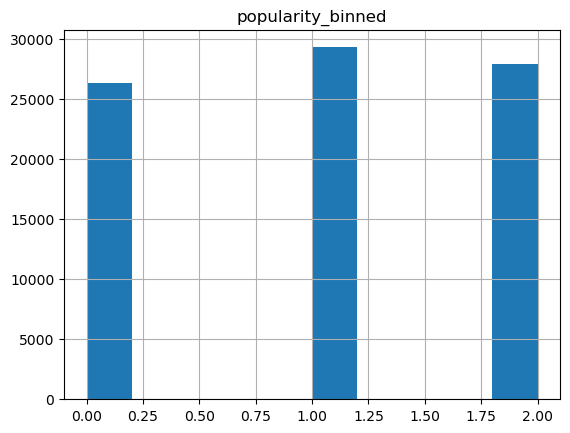

In [ ]:
data_binned.hist(column='popularity_binned')

In [ ]:
data_binned.groupby(by=['popularity_binned']).mean()

,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,loudness,popularity,key,liveness,mode,speechiness,tempo,valence
popularity_binned,,,,,,,,,,,,,,,
0.0,0.441771,0.604796,0.495855,0.433680,0.412963,0.003264,0.060412,0.705802,0.179544,0.468043,0.389919,0.767572,0.227032,0.494614,0.564145
1.0,0.671035,0.348716,0.538893,0.510630,0.567469,0.030212,0.054052,0.758300,0.385787,0.473914,0.371512,0.749838,0.234879,0.520380,0.581047
2.0,0.822232,0.276933,0.571498,0.515721,0.624096,0.110194,0.036805,0.806050,0.579828,0.475435,0.366534,0.704032,0.262881,0.526818,0.534758


### Modelo de Árvores de Decisão

Vamos agora criar um modelo de árvores de decisão para prever o intervalo de popularidade de uma música.

In [ ]:
"""
Hyperparameters:
criterion - The function to measure the quality of a split.
    "entropy" - Entropy = 0 means it is pure split (all instances are of only 1 class). Entropy = 1 means it is impure split.
    "gini" - 
max_depth - The maximum number of levels in the tree.
min_samples_leaf - The minimum number of samples allowed in a leaf.
min_samples_split - The minimum number of samples required to split an internal node.
"""
classifier = DecisionTreeClassifier(random_state=2023, criterion='entropy', splitter='best') 

Before training the model, we must assure that all features are non categorical.

In [ ]:
continous_features = data_binned.copy()
#continous_features['artist_name'] = lb_make.fit_transform(continous_features['artist_name'])
#continous_features['genre'] = lb_make.fit_transform(continous_features['genre'])
#continous_features

In [ ]:
X_dt = continous_features.drop(['popularity', 'popularity_binned'], axis=1)
y_dt = continous_features['popularity_binned'].to_frame()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.25, random_state=101)

In [ ]:
y_train

,popularity_binned
43909,2.0
30861,0.0
75144,2.0
34679,0.0
61138,2.0
...,...
5695,0.0
73542,2.0
83281,2.0
83467,2.0


In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2023)

In [ ]:
d_tree_predictions = classifier.predict(X_test)
d_tree_predictions

array([0., 2., 0., ..., 1., 1., 2.])

In [ ]:
df = pd.DataFrame(d_tree_predictions, columns = ['prediction_binned'])
pred_actual = df.merge(right=y_test, left_index=True, right_index=True)
pred_actual.head()

,prediction_binned,popularity_binned
4,0.0,0.0
59,1.0,0.0
75,2.0,0.0
81,2.0,0.0
84,0.0,0.0


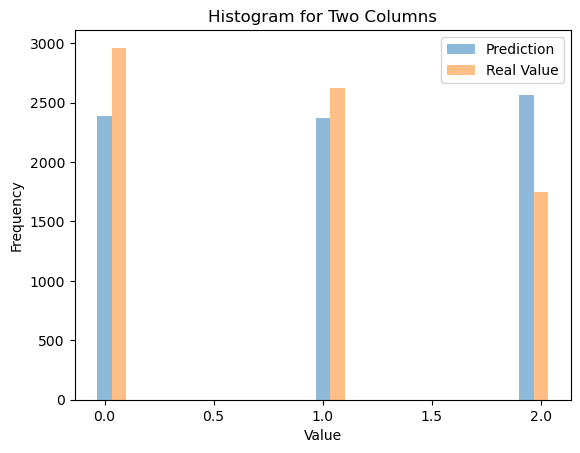

In [ ]:
# Create histograms for each column
plt.hist(pred_actual['prediction_binned'], align='left', bins=30, alpha=0.5, label='Prediction')
plt.hist(pred_actual['popularity_binned'], align='right', bins=30, alpha=0.5, label='Real Value')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Two Columns')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()

In [ ]:
confusion_matrix(y_test, d_tree_predictions)

array([[8174, 2552,  882],
       [2597, 5615, 3356],
       [ 916, 3391, 8142]], dtype=int64)

In [ ]:
accuracy_score(y_test, d_tree_predictions)

0.6156070175438596

In [ ]:
f1_score(y_test, d_tree_predictions, average='weighted')

0.6155321914518275

In [ ]:
precision_score(y_test, d_tree_predictions, average='weighted')

0.6154662240433298

In [ ]:
recall_score(y_test, d_tree_predictions, average='weighted')

0.6156070175438596

##### Árvores de Decisão com cross-validation

In [ ]:
cross_valid_model = LinearRegression()

In [ ]:
scores = cross_val_score(classifier, X_dt, y_dt, cv=5, scoring='accuracy')

In [ ]:
scores.mean()

0.5817103004537556

In [ ]:
scores.std()

0.07194884916879599

Grid Search

In [ ]:
param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_clf_dtrees = GridSearchCV(classifier, param_grid, refit=True, verbose=3)

In [ ]:
grid_clf_dtrees.fit(X_dt, y_dt)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.798 total time=   0.3s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.567 total time=   0.2s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.417 total time=   0.2s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.689 total time=   0.2s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.850 total time=   0.2s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.797 total time=   0.3s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.570 total time=   0.3s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.417 total time=   0.3s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.629 total time=   0.3s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.830 total time=   0.3s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.784 total time=   0.4s
[CV 2/5] END .......criterion=gini, max_depth=6

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=2023),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             verbose=3)

In [ ]:
grid_clf_dtrees.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [ ]:
grid_clf_dtrees.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2023)

In [ ]:
grid_dtrees_predictions = grid_clf_dtrees.predict(X_test)
print(classification_report(y_test, grid_dtrees_predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76     11608
         1.0       0.54      0.72      0.61     11568
         2.0       0.81      0.65      0.72     12449

    accuracy                           0.69     35625
   macro avg       0.72      0.69      0.70     35625
weighted avg       0.72      0.69      0.70     35625



In [ ]:
accuracy_score(y_test, grid_dtrees_predictions)

0.6935298245614036

In [ ]:
f1_score(y_test, grid_dtrees_predictions, average='weighted')

0.7001395215510425

In [ ]:
precision_score(y_test, grid_dtrees_predictions, average='weighted')

0.7233567434975023

In [ ]:
recall_score(y_test, grid_dtrees_predictions, average='weighted')

0.6935298245614036

### Logistic Regression

In [115]:
from sklearn import linear_model

In [116]:
log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [117]:
log_reg.fit(X_train, y_train)

c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [118]:
lr_predictions = log_reg.predict(X_test)
lr_predictions

array([1., 2., 2., ..., 2., 2., 2.])

In [119]:
df = pd.DataFrame(lr_predictions, columns = ['prediction_binned'])
pred_actual = df.merge(right=y_test, left_index=True, right_index=True)
pred_actual.head()

,prediction_binned,popularity_binned
4,1.0,0.0
59,2.0,0.0
75,2.0,0.0
81,2.0,0.0
84,2.0,0.0


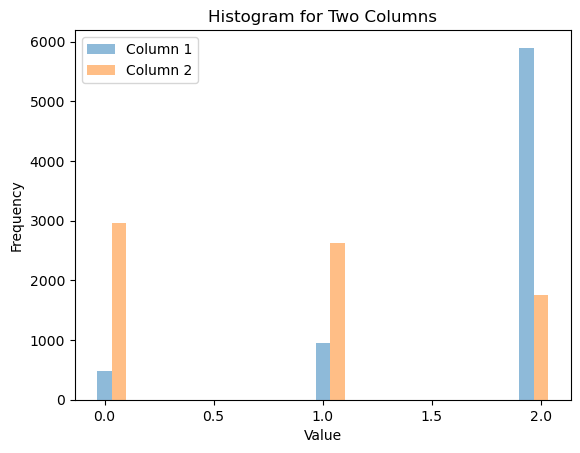

In [120]:
# Create histograms for each column
plt.hist(pred_actual['prediction_binned'], align='left', bins=30, alpha=0.5, label='Column 1')
plt.hist(pred_actual['popularity_binned'], align='right', bins=30, alpha=0.5, label='Column 2')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Two Columns')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()

In [121]:
confusion_matrix(y_test, lr_predictions)

array([[ 1309,  1586,  8713],
       [  651,  1715,  9202],
       [  441,  1129, 10879]], dtype=int64)

In [122]:
accuracy_score(y_test, lr_predictions)

0.39025964912280703

In [123]:
r2_score(y_test, lr_predictions)

-1.046166336906495

In [124]:
f1_score(y_test, lr_predictions, average='weighted')

0.31486451930480275

In [125]:
precision_score(y_test, lr_predictions, average='weighted')

0.4353801998881727

In [126]:
recall_score(y_test, lr_predictions, average='weighted')

0.39025964912280703

Grid Search

In [127]:
param_grid = {"C" : np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

grid_clf_lr = GridSearchCV(log_reg, param_grid, refit=True, verbose=3)

In [128]:
grid_clf_lr.fit(X_dt, y_dt)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.388 total time=   0.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.369 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.369 total time=   0.1s
[CV 1/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..................C=0.01, penalty=l1;, score=nan total time=   0.0s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ................C=0.01, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ................C=0.01, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ................C=0.01, penalty=l2;, score=0.388 total time=   0.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ................C=0.01, penalty=l2;, score=0.369 total time=   0.2s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ................C=0.01, penalty=l2;, score=0.369 total time=   0.1s
[CV 1/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .................C=0.1, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .................C=0.1, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .................C=0.1, penalty=l2;, score=0.388 total time=   0.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .................C=0.1, penalty=l2;, score=0.369 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .................C=0.1, penalty=l2;, score=0.369 total time=   0.1s
[CV 1/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=1.0, penalty=l1;, score=nan total time=   0.0s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .................C=1.0, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .................C=1.0, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .................C=1.0, penalty=l2;, score=0.388 total time=   0.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .................C=1.0, penalty=l2;, score=0.369 total time=   0.2s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .................C=1.0, penalty=l2;, score=0.369 total time=   0.1s
[CV 1/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..................C=10.0, penalty=l1;, score=nan total time=   0.0s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ................C=10.0, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ................C=10.0, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ................C=10.0, penalty=l2;, score=0.388 total time=   0.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ................C=10.0, penalty=l2;, score=0.369 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ................C=10.0, penalty=l2;, score=0.369 total time=   0.1s
[CV 1/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=100.0, penalty=l1;, score=nan total time=   0.0s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...............C=100.0, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...............C=100.0, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...............C=100.0, penalty=l2;, score=0.388 total time=   0.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...............C=100.0, penalty=l2;, score=0.369 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...............C=100.0, penalty=l2;, score=0.369 total time=   0.1s
[CV 1/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ................C=1000.0, penalty=l1;, score=nan total time=   0.0s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..............C=1000.0, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..............C=1000.0, penalty=l2;, score=0.374 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..............C=1000.0, penalty=l2;, score=0.388 total time=   0.3s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..............C=1000.0, penalty=l2;, score=0.369 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..............C=1000.0, penalty=l2;, score=0.369 total time=   0.1s


c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\mgdsb\miniconda3\envs\miniConda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit


GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [129]:
grid_clf_lr.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [130]:
grid_clf_lr.best_estimator_

LogisticRegression(C=0.001, max_iter=1000)

In [131]:
grid_lr_predictions = grid_clf_lr.predict(X_test)
print(classification_report(y_test, grid_lr_predictions))

              precision    recall  f1-score   support

         0.0       0.59      0.03      0.05     11608
         1.0       0.39      0.14      0.21     11568
         2.0       0.37      0.91      0.52     12449

    accuracy                           0.37     35625
   macro avg       0.45      0.36      0.26     35625
weighted avg       0.44      0.37      0.27     35625



### Support Vector Machines

In [132]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [133]:
svc_model = SVC(random_state=2023)

In [134]:
#svc_model.fit(X_train, y_train)

In [135]:
#svc_predictions = svc_model.predict(X_test)

In [136]:
df = pd.DataFrame(lr_predictions, columns = ['prediction_binned'])
pred_actual = df.merge(right=y_test, left_index=True, right_index=True)
pred_actual.head()

,prediction_binned,popularity_binned
4,1.0,0.0
59,2.0,0.0
75,2.0,0.0
81,2.0,0.0
84,2.0,0.0


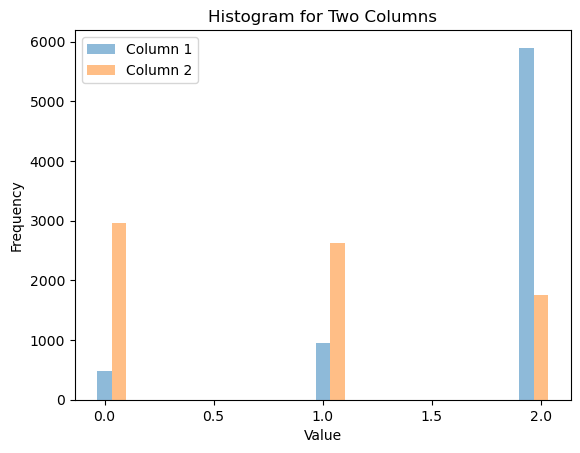

In [137]:
# Create histograms for each column
plt.hist(pred_actual['prediction_binned'], align='left', bins=30, alpha=0.5, label='Column 1')
plt.hist(pred_actual['popularity_binned'], align='right', bins=30, alpha=0.5, label='Column 2')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram for Two Columns')
plt.legend()  # Show legend with labels

# Display the plot
plt.show()

In [138]:
confusion_matrix(y_test, lr_predictions)

array([[ 1309,  1586,  8713],
       [  651,  1715,  9202],
       [  441,  1129, 10879]], dtype=int64)

In [139]:
accuracy_score(y_test, lr_predictions)

0.39025964912280703

In [140]:
r2_score(y_test, lr_predictions)

-1.046166336906495

In [141]:
f1_score(y_test, lr_predictions, average='weighted')

0.31486451930480275

In [142]:
precision_score(y_test, lr_predictions, average='weighted')

0.4353801998881727

In [143]:
recall_score(y_test, lr_predictions, average='weighted')

0.39025964912280703

Redes Neuronais

Topologia da rede

In [194]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation=activation)) # output

    # Compile the model
    model.compile(loss='binary_crossentropy',
        optimizer='sgd',
        metrics=['accuracy'])
    return model

Construção do modelo

In [195]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                240       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1873 (7.32 KB)
Trainable params: 1873 (7.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


GridSearch

In [206]:
#optimizer = ['SGD', 'RMSprop', 'Adagrad']
optimizer = ['SGD'] # foi o que apresentou melhores resultados
param_grid = dict(optimizer = optimizer)

In [207]:
kf = KFold(n_splits=5, shuffle=True, random_state=2021)

In [208]:
from scikeras.wrappers import KerasClassifier

Keras Classifier

In [209]:
model = KerasClassifier(model = build_model, batch_size = 32, validation_split=0.2, epochs=10)

Criar um modelo Grid Search

In [210]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring='accuracy', refit='True', verbose=1)

In [211]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Epoch 1/10


1253/1253 [==============================] - 3s 2ms/step - loss: -0.2565 - accuracy: 0.3485 - val_loss: -0.4290 - val_accuracy: 0.3569
Epoch 2/10
1253/1253 [==============================] - 3s 2ms/step - loss: -0.2526 - accuracy: 0.3483 - val_loss: -0.4290 - val_accuracy: 0.3569
Epoch 3/10
1253/1253 [==============================] - 3s 2ms/step - loss: -0.2526 - accuracy: 0.3483 - val_loss: -0.4290 - val_accuracy: 0.3569
Epoch 4/10
1253/1253 [==============================] - 3s 2ms/step - loss: -0.2526 - accuracy: 0.3483 - val_loss: -0.4290 - val_accuracy: 0.3569
Epoch 5/10
1253/1253 [==============================] - 3s 2ms/step - loss: -0.2526 - accuracy: 0.3483 - val_loss: -0.4290 - val_accuracy: 0.3569
Epoch 6/10
1253/1253 [==============================] - 3s 2ms/step - loss: -0.2526 - accuracy: 0.3483 - val_loss: -0.4290 - val_accuracy: 0.3569
Epoch 7/10
1253/1253 [==============================] - 3s 2ms/step - loss: -0.2526 - accuracy: 0.3483 - val_loss: -0.4290 - val_accura

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=KerasClassifier(batch_size=32, epochs=10, model=<function build_model at 0x7f700ec77760>, validation_split=0.2),
             param_grid={'optimizer': ['SGD']}, refit='True',
             scoring='accuracy', verbose=1)

In [212]:
y_train

,popularity_binned
43909,2.0
30861,0.0
75144,2.0
34679,0.0
61138,2.0
...,...
5695,0.0
73542,2.0
83281,2.0
83467,2.0


Verificar qual é o valor e os parâmetros do melhor resultado

In [213]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.314804 using {'optimizer': 'SGD'}


In [214]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

In [215]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.314804 (0.004162) with: {'optimizer': 'SGD'}


Encontrar o melhor modelo

In [216]:
best_mlp_model = grid_search.best_estimator_ 
print(best_mlp_model)

KerasClassifier(
	model=<function build_model at 0x7f700ec77760>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)


Usar o melhor modelo

In [217]:
best_mlp_model.fit(X_train, y_train, epochs = 40, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/40
1885/1958 [===========================>..] - ETA: 0s - loss: 15.7319 - accuracy: 0.3146

KeyboardInterrupt: 

In [ ]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss Values')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8, 5))
plt.show()

Previsões

In [ ]:
predictions = best_mlp_model.predict(X_test)
predictions

Observar os valores obtidos vs os valores reais

In [ ]:
plt.scatter(y_test, predictions)

Avaliar o modelo

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Criar uma forma de visualizar os resultados do modelo

In [ ]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit], label='Actual', color='green')
    plt.plot(predictions[:limit], label='Predicted', color='red')
    plt.grid(alpha=0.3)
    plt.xlabel('Houses')
    plt.ylabel('Price')
    plt.title('Real vs Predicted')
    plt.legend()
    plt.show()

In [ ]:
real_predicted_viz(200)

### Clustering

In [2]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [3]:
selected_features_clustering = ['popularity', 'year', 'energy']

/home/miguel/miniconda3/envs/firstCondaEnv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


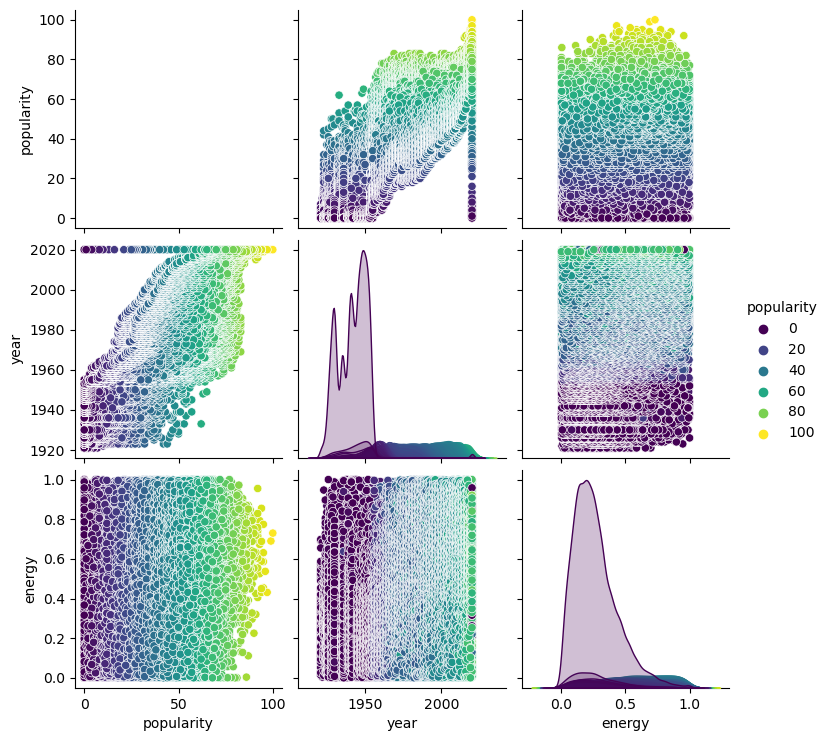

In [7]:
sns.pairplot(data, vars=selected_features_clustering, hue='popularity', palette='viridis')

In [40]:
final_data = data.copy()
final_data = final_data[selected_features_clustering]
final_data['popularity_bin'] = final_data['popularity'].apply(lambda x: 1 if x > 50 else 0)
final_data = final_data.drop(['popularity'], axis=1)
final_data

,year,energy,popularity_bin
0,1928,0.1950,0
1,1928,0.0135,0
2,1928,0.2200,0
3,1928,0.1300,0
4,1928,0.2040,0
...,...,...,...
169904,2020,0.4430,1
169905,2020,0.3850,1
169906,2020,0.5390,1
169907,2020,0.7610,1


In [42]:
real_y = final_data['popularity_bin']
train_data_clustering = final_data.drop('popularity_bin', axis=1)
train_data_clustering

,year,energy
0,1928,0.1950
1,1928,0.0135
2,1928,0.2200
3,1928,0.1300
4,1928,0.2040
...,...,...
169904,2020,0.4430
169905,2020,0.3850
169906,2020,0.5390
169907,2020,0.7610


#### KMeans

In [43]:
"""
n_clusters: The number of clusters to form as well as the number of centroids to generate.
n_init: Number of times the k-means algorithm is run with different centroid seeds.
"""
kmeans = KMeans(n_clusters=2, n_init=10, random_state=2023)
kmeans.fit(train_data_clustering)

KMeans(n_clusters=2, n_init=10, random_state=2023)

In [44]:
result = pd.merge(pd.DataFrame(real_y), pd.DataFrame(kmeans.labels_, columns=["label"]), left_index=True, right_index=True)    
#result = pd.merge(pd.DataFrame(X_test), pd.DataFrame(result), left_index=True, right_index=True)    
result

,popularity_bin,label
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
169904,1,0
169905,1,0
169906,1,0
169907,1,0


In [45]:
result

,popularity_bin,label
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
169904,1,0
169905,1,0
169906,1,0
169907,1,0


In [46]:
result['label'] = result['label'].replace({0:1, 1:0})

In [47]:
result

,popularity_bin,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
169904,1,1
169905,1,1
169906,1,1
169907,1,1


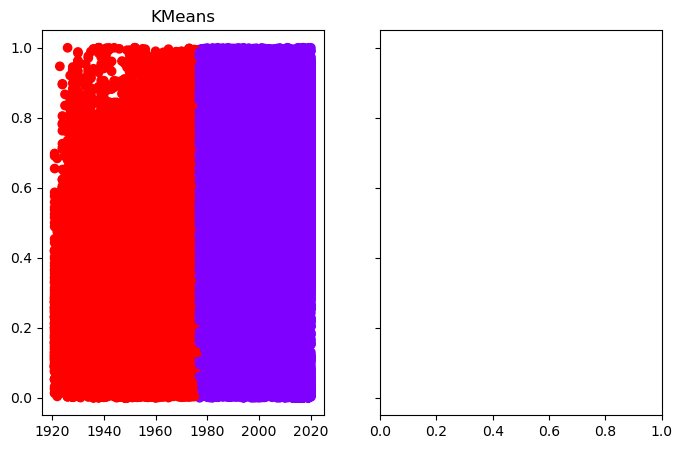

In [72]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(8, 5))
ax1.set_title('KMeans')
ax1.scatter(train_data_clustering['year'], train_data_clustering['energy'],c=kmeans.labels_,cmap='rainbow')

Verificar se existe correlação entre a label e a popularidade

<Axes: >

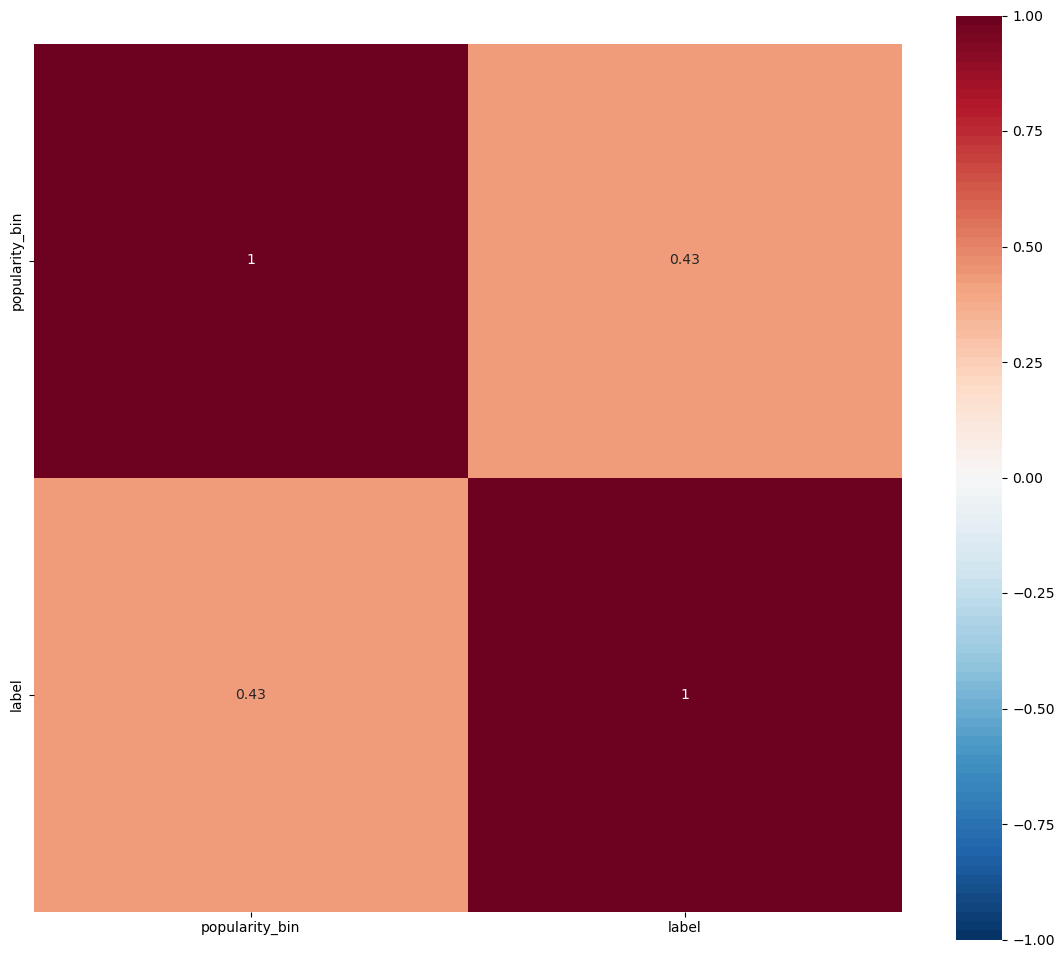

In [73]:
corr_matrix = result.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

In [75]:
result.groupby(by=['label']).mean(numeric_only=True)

,popularity_bin
label,
0,0.030272
1,0.380670


In [76]:
print(confusion_matrix(result['popularity_bin'], result['label']))

[[79763 54288]
 [ 2490 33368]]


In [51]:
print(classification_report(result['popularity_bin'], result['label']))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74    134051
           1       0.38      0.93      0.54     35858

    accuracy                           0.67    169909
   macro avg       0.68      0.76      0.64    169909
weighted avg       0.85      0.67      0.70    169909



#### KMedoids

In [36]:
from sklearn_extra.cluster import KMedoids

In [59]:
train_data_clustering.sample(frac=0.1)

,year,energy
85940,2000,0.864
143521,2012,0.760
31999,2018,0.284
48766,1951,0.345
165452,1976,0.617
...,...,...
47421,2014,0.719
140760,1985,0.678
32163,2020,0.702
60535,1993,0.352


In [62]:
sample = train_data_clustering.sample(frac=0.1)

In [63]:
kMedoids = KMedoids(n_clusters=2, random_state=2023)
kMedoids.fit(sample) # Se usar os dados todos dá erro de memória

KMedoids(n_clusters=2, random_state=2023)

In [64]:
kMedoids.cluster_centers_

array([[1.956e+03, 3.010e-01],
       [1.999e+03, 6.130e-01]])

In [65]:
kMedoids.labels_

array([0, 1, 0, ..., 1, 1, 1])

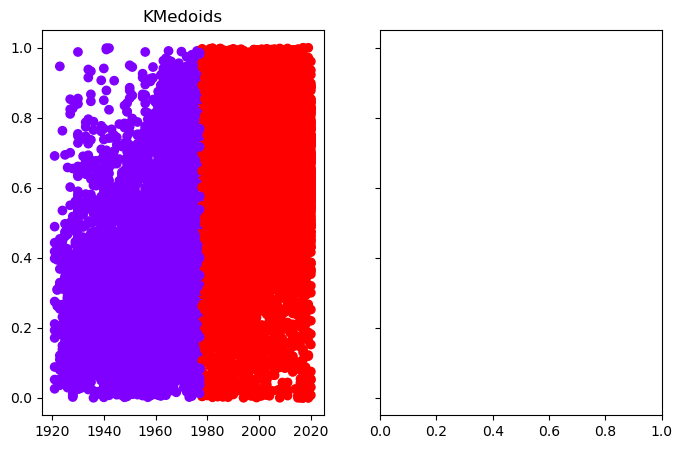

In [66]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(8, 5))
ax1.set_title('KMedoids')
ax1.scatter(sample['year'], sample['energy'],c=kMedoids.labels_,cmap='rainbow')

In [67]:
pd.DataFrame(kMedoids.labels_).value_counts()

1    8555
0    8436
Name: count, dtype: int64

In [68]:
result_kMedoids = pd.merge(pd.DataFrame(real_y), pd.DataFrame(kMedoids.labels_, columns=["label"]), left_index=True, right_index=True)    
#result = pd.merge(pd.DataFrame(X_test), pd.DataFrame(result), left_index=True, right_index=True)    
result_kMedoids

,popularity_bin,label
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
16986,0,1
16987,0,1
16988,0,1
16989,0,1


<Axes: >

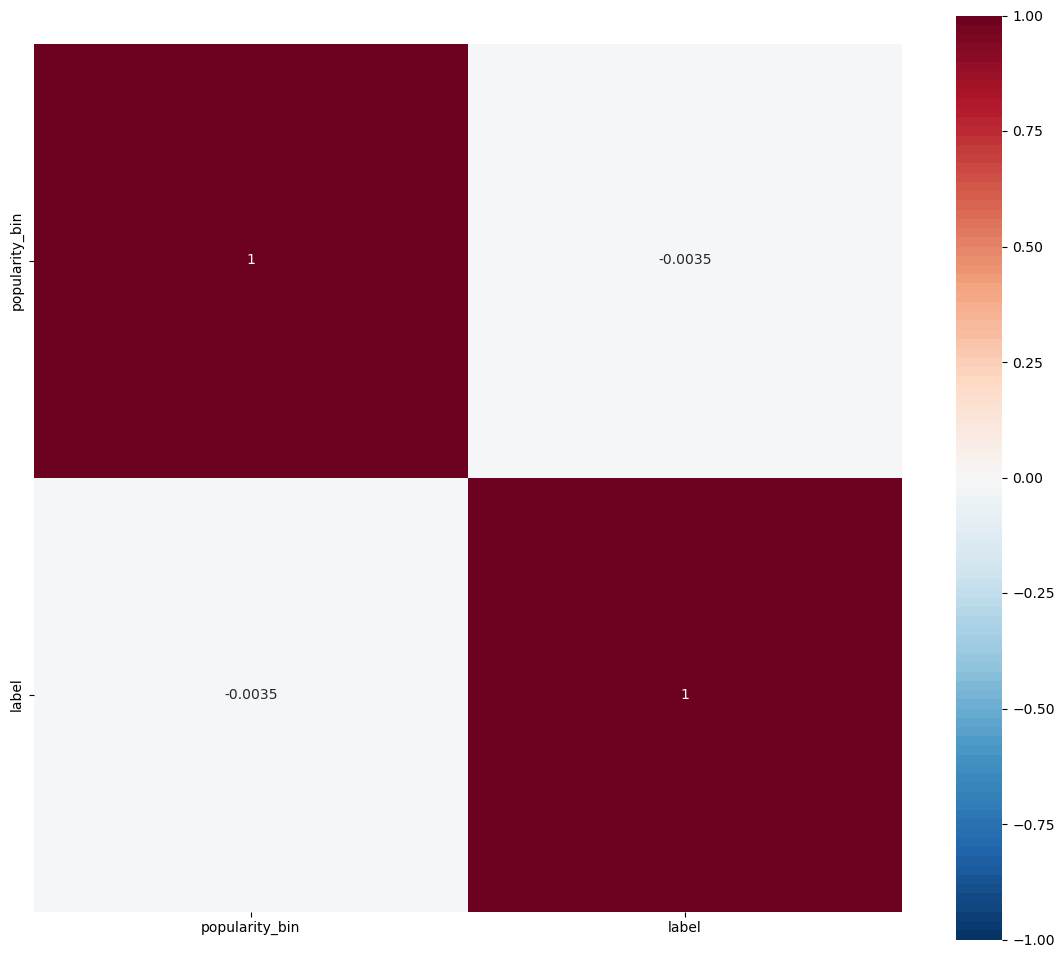

In [69]:
corr_matrix = result_kMedoids.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, cmap=sns.color_palette("RdBu_r", 100))

In [70]:
result_kMedoids.groupby(by=['label']).mean(numeric_only=True)

,popularity_bin
label,
0,0.136795
1,0.134424


In [77]:
print(confusion_matrix(result_kMedoids['popularity_bin'], result_kMedoids['label']))

[[7282 7405]
 [1154 1150]]


In [78]:
print(classification_report(result_kMedoids['popularity_bin'], result_kMedoids['label']))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63     14687
           1       0.13      0.50      0.21      2304

    accuracy                           0.50     16991
   macro avg       0.50      0.50      0.42     16991
weighted avg       0.76      0.50      0.57     16991

